
#### Teoría de Circuitos II

### 2023

#  Trabajo Práctico Laboratorio 1: Filtro NOTCH

#### Grupo 2
#### Curso: R4052
#### Autor: Federico Rodriguez Vizzon


## Consigna

Diseñar, simular en forma numérica y circuital, construir y ensayar en laboratorio un filtro del tipo notch con las siguientes características:

$f_0 = 50Hz$

$B = 10Hz$

$\alpha_{max} = 3dB$

## Diseño

### Funcion transferencia   

$T(s) = \frac{s^2 + \omega_0}{s^2 + s \frac{\omega_0}{Q} + \omega_0^2}$

$Q = \frac{\omega_0}{B \sqrt{q^2 -1}}$

$B =\left(\omega_2 - \omega_1\right) $

$q = 10^{\frac{\alpha_{max}}{20}} $

Si $\alpha_{max} = 3db \implies q = \sqrt(2) \implies Q = \frac{\omega_0}{\omega_2 - \omega_1} = \frac{f_0}{f_2 - f_1}$

$f_0 = \sqrt{f_1f_2}$



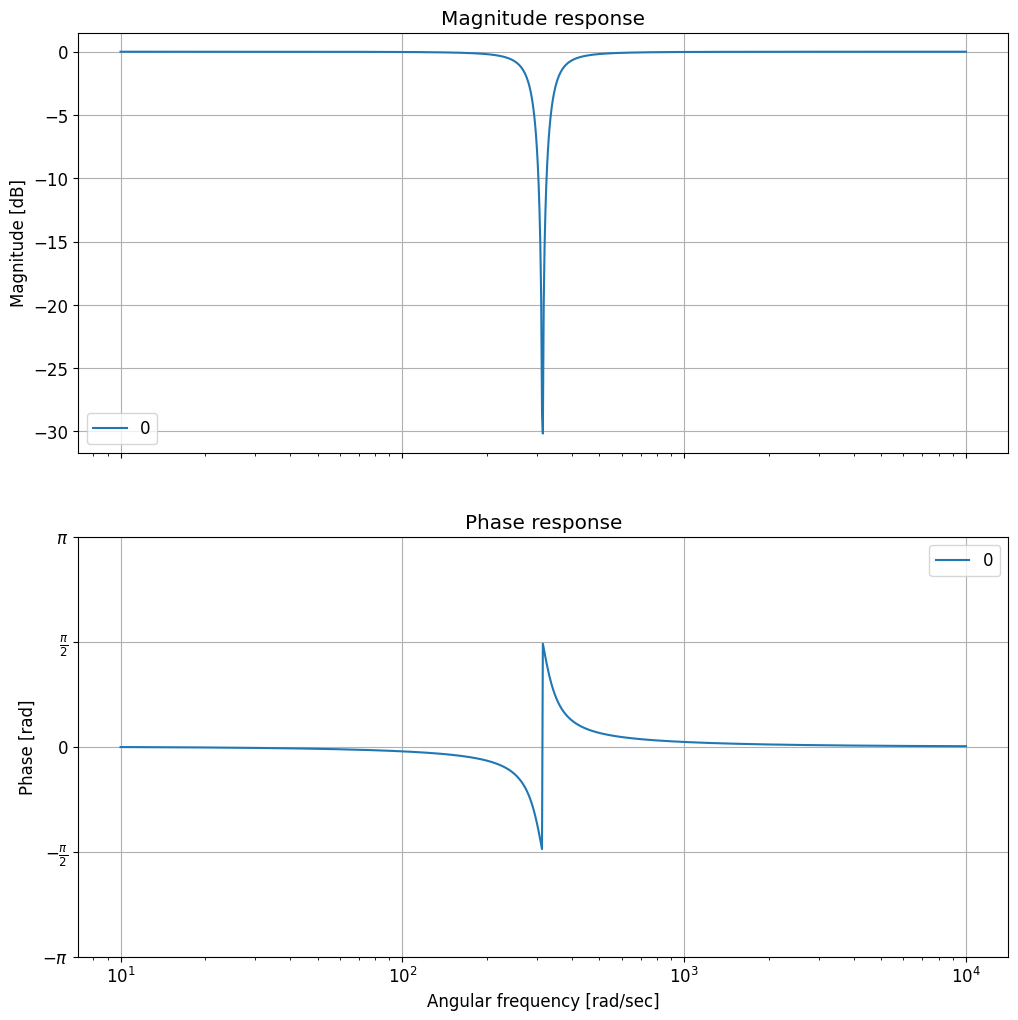

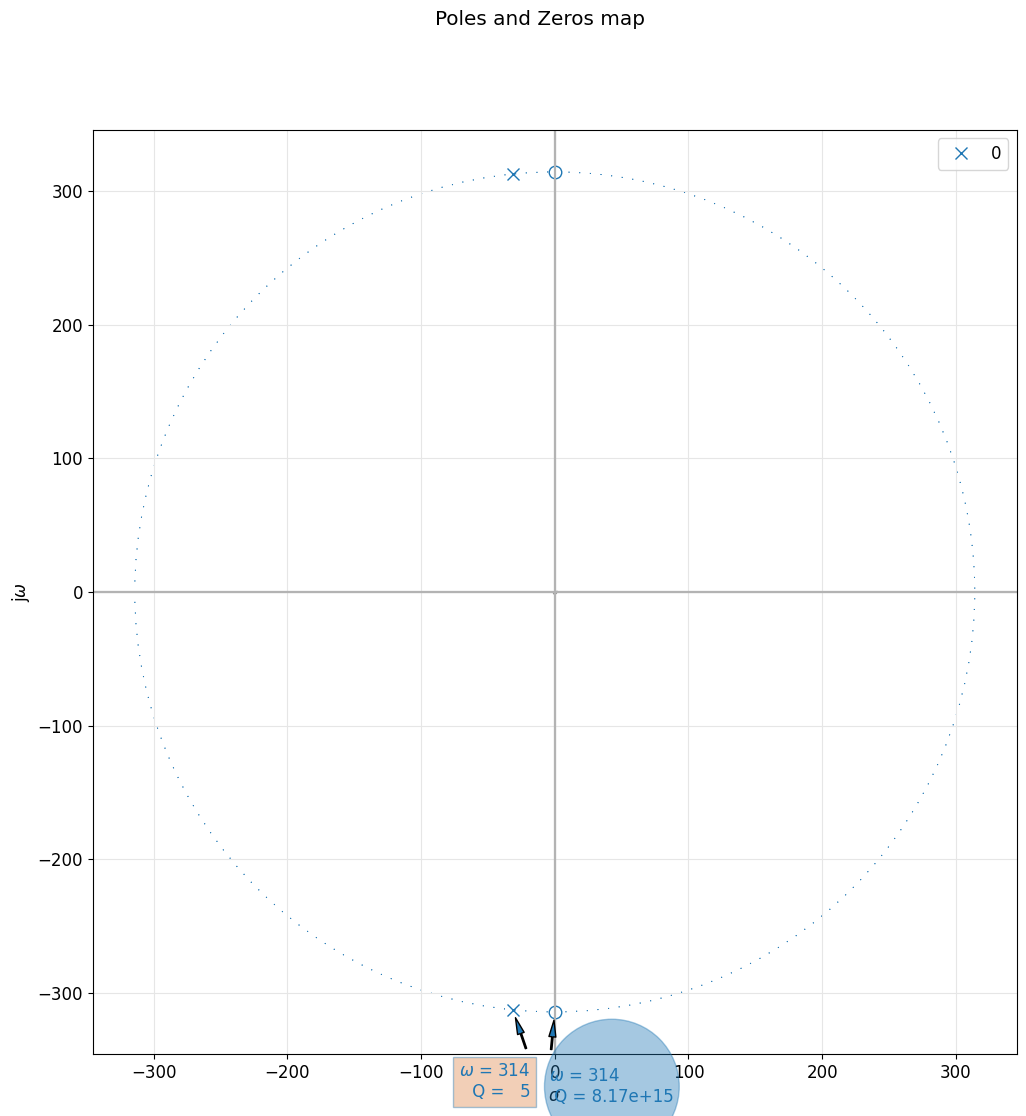

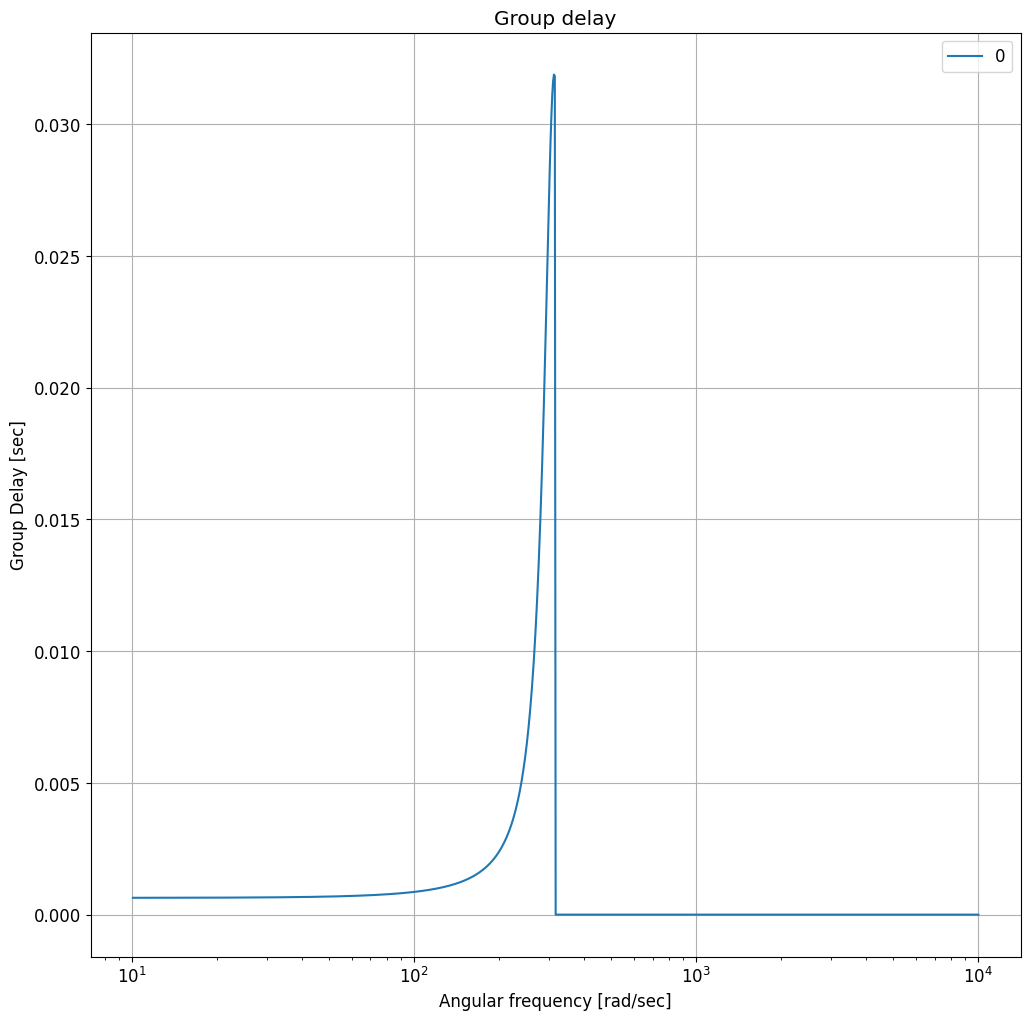

In [30]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plot
import matplotlib
from IPython.display import display, Markdown
from scipy import signal as signal
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import Chebyshev_polynomials
from pytc2.sistemas_lineales import TransferFunction as tf
f_o = 50
b = 10
w_o = 2*np.pi*f_o
q = f_o/10

num_notch = [1, 0, (w_o**2)]
den_notch = [1, (w_o/q), (w_o**2)]
tf(num_notch, den_notch)
analyze_sys(tf(num_notch, den_notch))


## Sintesis del circuito

Partiendo del siguiente circuito obtenido de la nota de aplicacion 746-7592 procedemos a calcular los valores de los componentes para sintetizar un filtro notch con $f_o = 50Hz$ 

<img src="./assets/notch_circuit.png" align="center" width = "800"/> 

### Ecuaciones de diseño

$f_0 = \frac{1}{R_FC2\pi} \implies R_F = \frac{1}{2\pi f_0 C}$

$R_{F1} = R_{F2} = R_F \land C = C_1 = C_2 = 1000pF$

$B = \frac{f_0}{Q}$

$R_Q = \frac{25K}{Q -1}$

$Q = \frac{R_{Z3}}{R_{Z1}} = \frac{R_{Z3}}{R_{Z1}} \implies R_{Z2} = R_{Z1}$

De lo calculado anteriormente sabemos que $Q = 5$ $B = 10$ y $f_0 = 50$

Adoptamos $R_{Z3} = 10K\Omega \implies R_{Z1}=R_{Z2} = \frac{R_{Z3}}{Q} = \frac{10K\Omega}{5} = 2K\Omega$ 

$R_Q = \frac{25K\Omega}{Q - 1} = \frac{25K\Omega}{4} = 6250\Omega$

$R_F = \frac{1}{2\pi f_0 C} = 3.1830M\Omega$

## Simulacion en LTSpice

<img src="./assets/schematic.png" align="left"/>

### Modulo y fase

<img src="./assets/ac_plot_4.png" align="left"/>

### Frecuencia central

<img src="./assets/ac_plot_6.png" align="left"/>

## Frecuencia de corte

<img src="./assets/ac_plot_7.png" align="left"/>

<img src="./assets/ac_plot_8.png" align="left"/>



## Implementacion

Para el diseño y construccion del prototipo se utilizo KiCAD.

<img src="./assets/pcb.png" align="left"/>
<img src="./assets/front.jpg" align="left"/>
<img src="./assets/back.jpg" align="left"/>


## Ensayo

Setup de medicion:

<img src="./assets/dut.png" align="center"/>

Se exito la red con una senoidal de $f$ variable de $1Hz$ a $1000Hz$ con una $Vpp = 10V$.

Por la naturaleza de la funcion transferencia se tomaron mayor cantidad de puntos en torno a la frecuencia central $f_o = 50Hz$ ya que en esta region se encuentran las variaciones de modulo y fase.

Instrumental utilizado:
* Osciloscopio NG1853
* Generador de funciones NG1909
* Fuente CC NG1811
* Fuente CC NG1351


## Curvas de Modulo, Fase y retardo de grupo obtenidas con el uso del osciloscopio

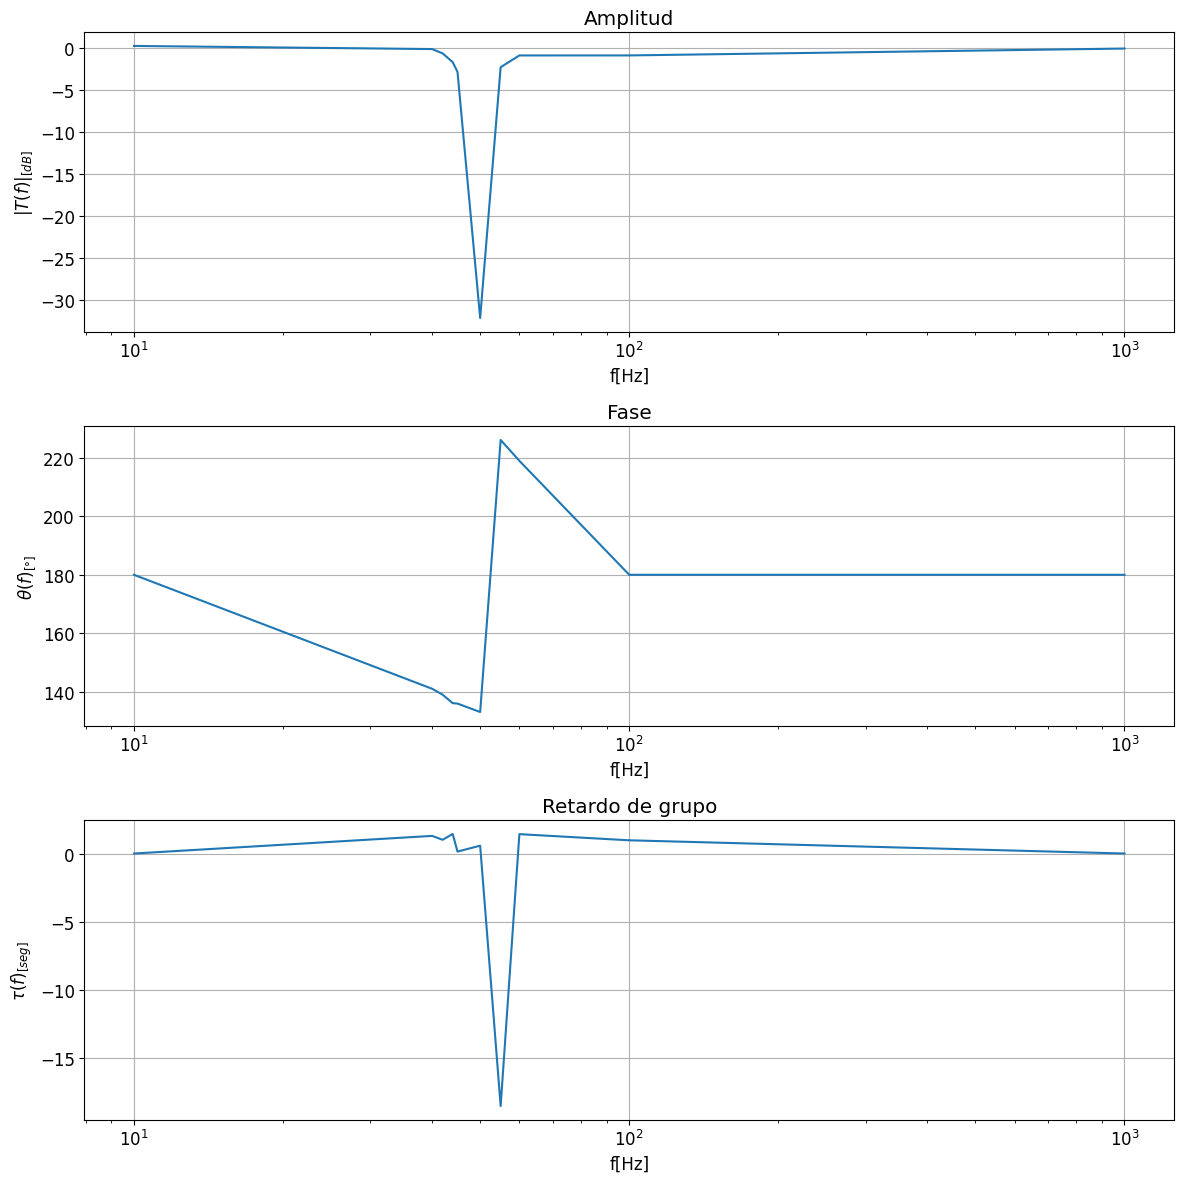

In [31]:
## mediciones con oscilocopio
f = np.array([10,40,42,44,45,50,55,60,100,1000])
phase = np.array([180, 141.12, 139.104, 136.224, 136.08, 133.2, 226, 218.88, 180, 180])
vo = np.array([9.68, 9.62, 9.55,  7.11, 6.71, 0.24, 7.42, 8.57, 9.19,  10.47])
vi = np.array([9.35, 9.7,  10.22, 8.57, 9.25, 9.66, 9.59, 9.43, 10.11, 10.48])
amp = 20*np.log10(vo/vi)
ret = -np.diff(phase)/np.diff(f)
ret = np.insert(ret, 0,0,axis = 0)


#levantamos los valores de modulo (previeamente descartamos el header y otro relleno del csv.)
# TODO obtener los valores con el analizado de audio y plotearlos junto a los valores obtenidos manualmente.
module_csv = genfromtxt('csv_files/modulo_demo.csv', delimiter = ',')
y_0_axis_amplitude = module_csv[:, 1] 
x_0_axis_frequency = module_csv[:, 0]

##Valores maximos y minimos que tenemos que representar en el eje x
x_0_upper_limit = max(x_0_axis_frequency)
x_0_lower_limit = min(x_0_axis_frequency)

##Valores maximos y minimos que tenemos que representar en el eje y
y_0_upper_limit = max(y_0_axis_amplitude)*1.1
y_0_lower_limit = min(y_0_axis_amplitude)*0.9

#levantamos la curvar de fase:
fase_csv = genfromtxt('csv_files/fase.csv', delimiter = ',')
y_1_axis_phase = fase_csv[:, 1] 
x_1_axis_frequency = fase_csv[:, 0]

##Valores maximos y minimos que tenemos que representar en el eje x
x_1_upper_limit = max(x_1_axis_frequency)
x_1_lower_limit = min(x_1_axis_frequency)

##Valores maximos y minimos que tenemos que representar en el eje x
y_1_upper_limit = max(y_1_axis_phase)*1.1
y_1_lower_limit = min(y_1_axis_phase)*0.9

display(Markdown("""## Curvas de Modulo, Fase y retardo de grupo obtenidas con el uso del osciloscopio"""))

##Configuramos el graph
matplotlib.rcParams['figure.figsize'] = (12,12)
matplotlib.rcParams['font.size'] = 12
#configuramos la cantidad de graficos, 3 filas 1 columna
figure, axes = plot.subplots(3,1)

axes[0].plot(f, amp)
axes[0].set_ylabel(r'$|T(f)|_{[dB]}$')
axes[0].set_xlabel('f[Hz]')
axes[0].set_xscale('log')
axes[0].grid()
axes[0].set_title("Amplitud")
#limitamos el grafico a los valores de frecuencia disponibles.
#axes[0].set_xlim([x_0_lower_limit, x_0_upper_limit])
#no limitamos en y, la libreria lo esta resolviendo mejor que nosotros.
#axes[0].set_ylim([y_0_lower_limit, y_0_upper_limit])

axes[1].plot(f, phase)
axes[1].set_ylabel(r'$\theta (f)_{[°]}$')
axes[1].set_xlabel('f[Hz]')
axes[1].set_xscale('log')
axes[1].grid()
axes[1].set_title("Fase")
#axes[1].set_xlim([x_1_lower_limit, x_1_upper_limit])
axes[2].plot(f, ret)
axes[2].set_ylabel(r'$\tau (f)_{[seg]}$')
axes[2].set_xscale('log')
axes[2].set_xlabel('f[Hz]')
axes[2].grid()
axes[2].set_title("Retardo de grupo")
figure.tight_layout()


## Conclusiones: 

### Amplitud
La curva obtenida en forma manual hasta llegar a $f_o$ es muy similar a la obtenida en la simulacion numerica, pero al ir de $f_o$ hacia $\infty$ se tomaron menos puntos y la interpolacion denota muchos errores al momento de graficar la respuesta en amplitud del filtro implementado. 
En el punto central, se aprecia una atenuacion similar a la obtenida con el calculo numerico 30db pero muy inferior a la simulada en spice 63db.
Cuando nos acercabamos a la frecuencia central el ruido medido por el osciloscopio se volvia notorio y dificultaba la medicion.

### Fase
Al momento de seleccionar los puntos en que se iba a medir se le dio mucho peso a la respuesta en amplitud y esto tiene como consecuencia que la curva de fase sea abrupta y este un poco alejada de la curva ideal. 
Se deberian haber tomado mas puntos intermedios entre los 30Hz y los 80 Hz que si bien desde el punto de vista de 
amplitud serian "redundantes" hubiesen aportado mucha informacion para trazar la respuesta de fase.